## <div style="text-align: right"> Mayank Pathak </div>
# Problem Set 2
## Question 3 
### Classifying Breast Cancer Dataset 

### October 08, 2018

- 1. **Introduction** 
    - 1.1 Importing Necessary libraries
    - 1.2 Defining Hyper-Parameters
- 2. **Data Preparation**
    - 2.1  Load Data
- 3. **Neural Network**
    - 3.1 Define Activation Function 
    - 3.2 Define the Model
    - 3.3 Set the optimizer
    - 3.4 Fit the Training Data
- 4. **Evaluate Model**
    - 4.1 Evaluate the metwork with test data
    - 4.2 Plot Accuracy and Loss curves

### 1. Introduction

#### 1.1 Importing necessary libraries:
Libraries used for to create this network:
    1. numpy
    2. pandas 
    3. matplotlib
    4. keras
    5. sci-kit learn

In [34]:
import keras
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Dropout
%matplotlib inline


#### 1.2 Defining Hyper-Parameters and Initializing variables
The Hyper-Parameters for this model are:

    1. epochs
    2. batch size
    4. learning rate
    7. optimizer

In [35]:
# Number of epochs: initialized to 100 
epochs = 100

# Batch size per training iteration
batch_size = 1

# Learning Rate: initialized to 0.001
learning_rate = 0.001

# Define the optimizer
optimizer = RMSprop(lr = learning_rate)

### 2. Data Preparation

#### 2.1 Load Data
The input data and labels are loaded using 'pd.read_csv' function to load the '.csv' files provided with the homework assignment. <br>

The data is then divided into training and testing with a test size of 15%.

In [36]:
# loading training and test datasets
inputData = pd.read_csv("Breast Cancer/breastCancerData.csv")
inputLabels = pd.read_csv("Breast Cancer/breastCancerLabels.csv")

trainData, testData, trainLabels, testLabels = train_test_split(inputData, inputLabels, test_size=0.15)

# Splitting into validation and training data
trainData, valData, trainLabels, valLabels = train_test_split(trainData, trainLabels, test_size=0.10)


### 3. Neural Network

#### 3.1 Define the Model
The CNN is made of 4 fully connected layers. All hidden layers using 'relu' as activation function, and the output layer using 'sigmoid' as activating function, because the output desired from this network is binary.

Dropout is added to help introduce redundancy into the model. After trying different values, I have taken 0.5 as dropout value for the fully connected networks.

In [37]:
model = Sequential()

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
# Adding dropout to prevent overfitting
model.add(Dropout(rate=0.2))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(rate=0.2))
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(rate=0.2))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Prev Results
# with dropout = 0.5, Test loss: 0.4178347518526997, Test accuracy: 0.9611650485436893

#### 3.2 Set the optimizer
RMSprop optimizer is used with learning rate 0.001.
Adam is used because it converges fast and uses adaptive learning rate. It also overcomes the problems of slow convergence, vanishing learning rate and fluctuating loss function.

In [38]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

#### 3.3 Fit the Training Data
Fitting the data on the model created, with the hyper-parameters defined earlier. 
Here, instead of creating a different set for validation, I have used the testing data set ot validate data.

In [39]:
history = model.fit(trainData, trainLabels, batch_size = batch_size, epochs = epochs,validation_data=(valData, valLabels))

Train on 521 samples, validate on 58 samples
Epoch 1/100
521/521 [==============================] - 2s 4ms/step - loss: 0.6748 - acc: 0.6852 - val_loss: 0.6353 - val_acc: 0.9310
Epoch 2/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5140 - acc: 0.9002 - val_loss: 0.3687 - val_acc: 0.9483
Epoch 3/100
521/521 [==============================] - 1s 3ms/step - loss: 0.3608 - acc: 0.9232 - val_loss: 0.2099 - val_acc: 0.9483
Epoch 4/100
521/521 [==============================] - 1s 3ms/step - loss: 0.3088 - acc: 0.9213 - val_loss: 0.1692 - val_acc: 0.9483
Epoch 5/100
521/521 [==============================] - 1s 3ms/step - loss: 0.2400 - acc: 0.9213 - val_loss: 0.2162 - val_acc: 0.9483
Epoch 6/100
521/521 [==============================] - 1s 3ms/step - loss: 0.2187 - acc: 0.9578 - val_loss: 0.2307 - val_acc: 0.9483
Epoch 7/100
521/521 [==============================] - 2s 3ms/step - loss: 0.2946 - acc: 0.9367 - val_loss: 0.2549 - val_acc: 0.9483
Epoch 8/100
521/521 [===

Epoch 62/100
521/521 [==============================] - 1s 3ms/step - loss: 0.2291 - acc: 0.9597 - val_loss: 0.4255 - val_acc: 0.9655
Epoch 63/100
521/521 [==============================] - 1s 3ms/step - loss: 0.2687 - acc: 0.9597 - val_loss: 0.4996 - val_acc: 0.9655
Epoch 64/100
521/521 [==============================] - 1s 3ms/step - loss: 0.3102 - acc: 0.9578 - val_loss: 0.4495 - val_acc: 0.9655
Epoch 65/100
521/521 [==============================] - 1s 3ms/step - loss: 0.2864 - acc: 0.9559 - val_loss: 0.4939 - val_acc: 0.9655
Epoch 66/100
521/521 [==============================] - 1s 3ms/step - loss: 0.2840 - acc: 0.9559 - val_loss: 0.5287 - val_acc: 0.9655
Epoch 67/100
521/521 [==============================] - 1s 3ms/step - loss: 0.2615 - acc: 0.9635 - val_loss: 0.4155 - val_acc: 0.9655
Epoch 68/100
521/521 [==============================] - 1s 3ms/step - loss: 0.1895 - acc: 0.9559 - val_loss: 0.3965 - val_acc: 0.9655
Epoch 69/100
521/521 [==============================] - 1s 3ms

### 4. Evaluate Model

#### 4.1 Evaluate the metwork with test data

In [40]:
score = model.evaluate(testData, testLabels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.08614331599578116
Test accuracy: 0.9708737869864529


#### 4.2 Plot Accuracy and Loss curves

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


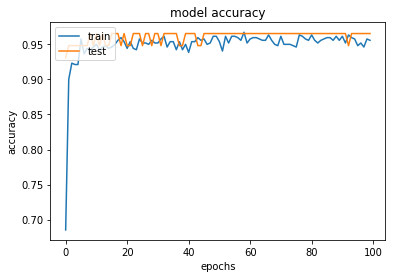

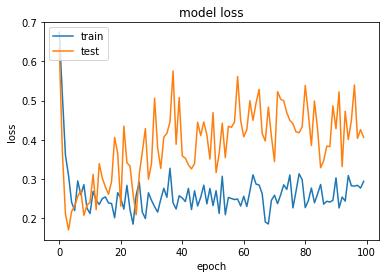

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                160       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_18 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 7         
Total para

In [41]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.summary()